## Wrapper Methods for Feature Selection in Predicting Obesity Levels

This project analyzes survey data to predict obesity levels based on eating habits and physical condition. Data was sourced from the UCI Machine Learning Repository, with categorical variables converted into numerical formats to facilitate analysis. This study involves fitting a logistic regression model and applying three wrapper methods to select subsets of features: Sequential Forward Selection (SFS), Sequential Backward Selection (SBS), and Recursive Feature Elimination (RFE). 

The process aims to identify the most important predictors and evaluate their impact on model performance.

### Summary of Workflow
1. **Exploratory Data Analysis (EDA):** Analyze dataset structure and key statistics.
2. **Data Preparation:** Split the data into predictors (X) and outcome (y), and standardize predictors.
3. **Baseline Model:** Fit a logistic regression model with all features and evaluate accuracy.
4. **Feature Selection Methods:**
   - Apply SFS, SBS, and RFE to identify optimal feature subsets.
   - Compare model accuracy for selected subsets.
5. **Visualization:** Plot feature selection results to visualize accuracy trends.
6. **Insights and Conclusion:** Summarize findings and discuss selected features and their implications.


In [1]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
%matplotlib inline

## Evaluating a Logistic Regression Model

The data set `obesity` contains 18 predictor variables. Here's a brief description of them.

* `Gender` is `1` if a respondent is male and `0` if a respondent is female.
* `Age` is a respondent's age in years.
* `family_history_with_overweight` is `1` if a respondent has family member who is or was overweight, `0` if not.
* `FAVC` is `1` if a respondent eats high caloric food frequently, `0` if not.
* `FCVC` is `1` if a respondent usually eats vegetables in their meals, `0` if not.
* `NCP` represents how many main meals a respondent has daily (`0` for 1-2 meals, `1` for 3 meals, and `2` for more than 3 meals).
* `CAEC` represents how much food a respondent eats between meals on a scale of `0` to `3`.
* `SMOKE` is `1` if a respondent smokes, `0` if not.
* `CH2O` represents how much water a respondent drinks on a scale of `0` to `2`.
* `SCC` is `1` if a respondent monitors their caloric intake, `0` if not.
* `FAF` represents how much physical activity a respondent does on a scale of `0` to `3`.
* `TUE` represents how much time a respondent spends looking at devices with screens on a scale of `0` to `2`.
* `CALC` represents how often a respondent drinks alcohol on a scale of `0` to `3`.
* `Automobile`, `Bike`, `Motorbike`, `Public_Transportation`, and `Walking` indicate a respondent's primary mode of transportation. Their primary mode of transportation is indicated by a `1` and the other columns will contain a `0`.

The outcome variable, `NObeyesdad`, is a `1` if a patient is obese and a `0` if not.

We use the `.head()` method and inspect the data.

In [2]:
obesity = pd.read_csv("obesity.csv")

display(obesity)
print(obesity.info)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1,0
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1


<bound method DataFrame.info of       Gender        Age  family_history_with_overweight  FAVC  FCVC  NCP  \
0          0  21.000000                               1     0   2.0  3.0   
1          0  21.000000                               1     0   3.0  3.0   
2          1  23.000000                               1     0   2.0  3.0   
3          1  27.000000                               0     0   3.0  3.0   
4          1  22.000000                               0     0   2.0  1.0   
...      ...        ...                             ...   ...   ...  ...   
2106       0  20.976842                               1     1   3.0  3.0   
2107       0  21.982942                               1     1   3.0  3.0   
2108       0  22.524036                               1     1   3.0  3.0   
2109       0  24.361936                               1     1   3.0  3.0   
2110       0  23.664709                               1     1   3.0  3.0   

      CAEC  SMOKE      CH2O  SCC       FAF       TUE  C

Visualize class distribution for EDA

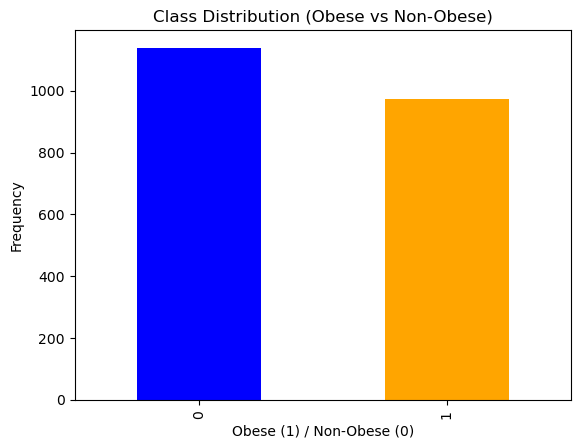

In [3]:
obesity['NObeyesdad'].value_counts().plot(kind='bar', title='Class Distribution (Obese vs Non-Obese)', color=['blue', 'orange'])
plt.xlabel('Obese (1) / Non-Obese (0)')
plt.ylabel('Frequency')
plt.show()

### Split the data into `X` and `y`

In order to use a linear regression model, we'll need to split the data into two parts: the predictor variables and an outcome variable. We can do this by splitting the data into a DataFrame of predictor variables called `X` and a Series of outcome variables `y`.

In [4]:
X =  obesity.iloc[:,:-1]  # another way to do this : obesity.drop(["NObeyesdad"], axis=1)
y = obesity['NObeyesdad']

### Logistic regression model

Create a logistic regression model called `lr`. It should include the parameter `max_iter=1000` to make sure that the model will converge when you try to fit it.

In [5]:
lr = LogisticRegression(max_iter=1000)

### Fit the model

Here we the `.fit()` method on `lr` to fit the model to `X` and `y`.

In [6]:
lr.fit(X, y)

LogisticRegression(max_iter=1000)

### Model accuracy

A model's _accuracy_ is the proportion of classes that the model correctly predicts. is Compute and print the accuracy of `lr` by using the `.score()` method. We want to know what percentage of respondents did the model correctly predict as being either obese or not obese?

In [7]:
print("Model Accurey for opur model is:", lr.score(X,y))

Model Accurey for opur model is: 0.7659876835622927


## Sequential Forward Selection

Now that we've created a logistic regression model and evaluated its performance, we're ready to do some feature selection. 

Create a sequential forward selection model called `sfs`. 
* Set the `estimator` parameter to `lr` and set the `forward` and `floating` parameters to the appropriate values. 
* Www wil use the parameters `k_features=9`, `scoring='accuracy'`, and `cv=0`.

In [8]:
# Create a sequential forward selection model
sfs = SFS(lr, k_features=9,  forward=True, floating=False, scoring='accuracy', cv=0)

### Fit the model

As expected, we can use the `.fit()` method on `sfs` to fit the model to `X` and `y`.

In [9]:
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(9, 9), scoring='accuracy')

### Inspect the results

Now that we've run the sequential forward selection algorithm on the logistic regression model with `X` and `y` we can see what features were chosen and check the model accuracy on the smaller feature set.

In [10]:
print(sfs.subsets_[9])

{'feature_idx': (0, 1, 2, 3, 6, 9, 10, 14, 17), 'cv_scores': array([0.78351492]), 'avg_score': 0.7835149218379914, 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')}


### Chosen features and model accuracy

Let´s use the dictionary `sfs.subsets_[9]` to print a tuple of chosen feature names. Then use it to print the accuracy of the model after doing sequential forward selection. Chek wow does this compare to the model's accuracy on all available features?

In [11]:
print("Chosen Names were:", sfs.subsets_[9]['feature_names'])


print("Model Accuracy after doing Sequential Forward Slection:", sfs.subsets_[9]['avg_score'])

Chosen Names were: ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')
Model Accuracy after doing Sequential Forward Slection: 0.7835149218379914


### Visualize model accuracy

It can be helpful to visualize the results of sequential forward selection and see how accuracy is affected as each feature is added. Use the code `plot_sfs(sfs.get_metric_dict())` to plot the model accuracy as a function of the number of features used.

C:\Users\Santiago\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Santiago\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


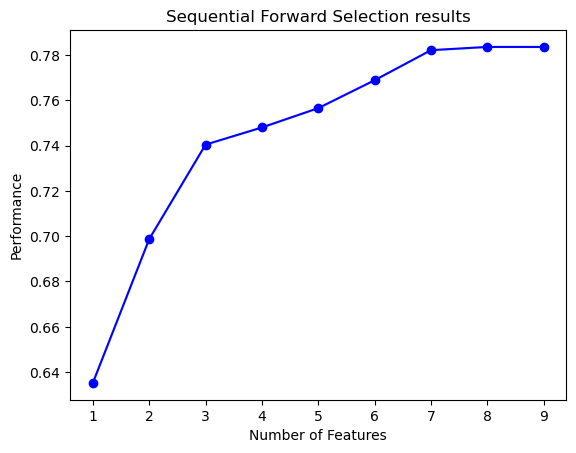

In [12]:
plot_sfs(sfs.get_metric_dict())
plt.title("Sequential Forward Selection results")
plt.show()

## Sequential Backward Selection

Sequential forward selection was able to find a feature subset that performed marginally better than the full feature set. Let's use a different sequential method and see how it compares.

We create a sequential backward selection model called `sbs`. 
* Set the `estimator` parameter to `lr` and set the `forward` and `floating` parameters to the appropriate values.
* We will use the parameters `k_features=7`, `scoring='accuracy'`, and `cv=0`.

In [13]:
sbs = SFS(lr, k_features=7, forward=False, floating=False, scoring='accuracy', cv=0)

### Fit the model

Use the `.fit()` method on `sbs` to fit the model to `X` and `y`.

In [14]:
sbs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(7, 7), scoring='accuracy')

### Inspect the results

Now let´s print `sbs.subsets_[7]` to inspect the results of sequential backward selection.

In [15]:
print(sbs.subsets_[7])

{'feature_idx': (1, 2, 3, 4, 6, 9, 16), 'cv_scores': array([0.76409285]), 'avg_score': 0.7640928469919469, 'feature_names': ('Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Public_Transportation')}


### Chosen features and model accuracy

We can use the dictionary `sbs.subsets_[7]` to print a tuple of chosen feature names and then use it to print the accuracy of the model after doing sequential backward selection. How does this compare to the model's accuracy on all available features?

In [16]:
print("\nFeatures choosen are:", sbs.subsets_[7]['feature_names'])

print("\nThe Model Accuracy is:", sbs.subsets_[7]['avg_score'])


Features choosen are: ('Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Public_Transportation')

The Model Accuracy is: 0.7640928469919469


### Visualize model accuracy

Let´s visualize the results of sequential backward floating selection and plot the model accuracy as a function of the number of features used.

C:\Users\Santiago\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Santiago\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


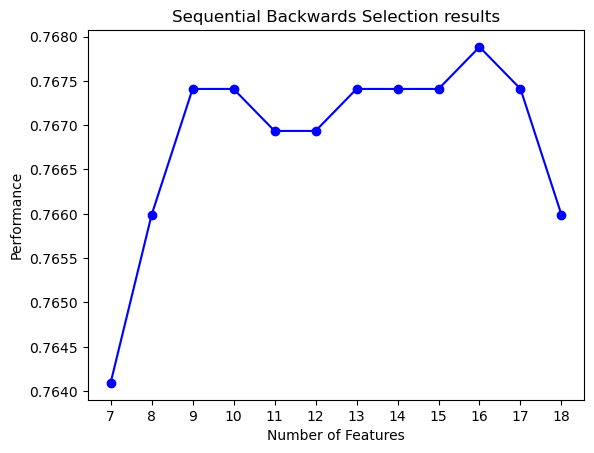

In [17]:
plot_sfs(sbs.get_metric_dict())
plt.title("Sequential Backwards Selection results")

plt.show()

## Recursive Feature Elimination

So far we've tried two different sequential feature selection methods. Let's try one more: recursive feature elimination. First we nned to standardize the data, then fit the RFE model and inspect the results.

In [18]:
features = X.columns

### Standardize the data

Before doing applying recursive feature elimination it is necessary to standardize the data. Standardize `X` and save it as a DataFrame by creating a `StandardScaler()` object and using the `.fit_transform()` method.

In [19]:
X = pd.DataFrame(StandardScaler().fit_transform(X))

### Recursive feature elimination model

Here we create an `RFE()` object that selects `8` features.

In [20]:
rfe = RFE(estimator=lr, n_features_to_select=8)

### Fit the model

Fit the recursive feature elimination model to `X` and `y`.

In [21]:
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

### Inspect chosen features

Now that you've fit the RFE model you can evaluate the results.

In [22]:
# See which features recursive feature elimination chose
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print("The features of our recursive model are:", rfe_features)

The features of our recursive model are: ['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking']


### Model accuracy

The `.score()` method on `rfe` can print the model accuracy after doing recursive feature elimination. 
- How does this compare to the model's accuracy on all available features?

In [23]:
print("The final score of the Recursive Elimination model is:", rfe.score(X, y))

The final score of the Recursive Elimination model is: 0.7678825201326386


### Insights and Conclusion

**1. Sequential Forward Selection (SFS):**
SFS identified 9 features that slightly improved the model's accuracy compared to using all features. This method incrementally added features based on their contribution to accuracy, selecting the best-performing subset.


**2. Sequential Backward Selection (SBS):**
SBS reduced the feature set to 7 features, with a minor trade-off in accuracy. This approach removed the least significant features iteratively, streamlining the model.


**3. Recursive Feature Elimination (RFE):**
RFE selected 8 features while maintaining competitive accuracy. It recursively removed less important features by ranking them based on their importance to the model.

**4. Key Predictors:**
Across all three methods, features like Age, family_history_with_overweight, and FAVC were consistently selected, highlighting their critical role in predicting obesity levels.
Visualization Trends:

**5. Visualization Trends:**
Accuracy trends from SFS and SBS visualizations underscored how selecting optimal feature subsets can balance performance and simplicity. The results highlighted the trade-offs between subset size and accuracy.


### Conclusion:
Wrapper methods effectively streamlined the feature set while maintaining comparable accuracy, demonstrating their value in predictive modeling. Future enhancements could include testing with external datasets and exploring additional feature selection techniques to ensure robustness and generalizability.